## Chartres signatures / fingerprints / empreintes

Use FDA (SETAC_Article2_figures.ipynb for reference) to define fingerprints.

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
data_directory = r'D:\VP\ARTICLE2\Terrain\ToxEvents_TOF825'
Tox = 825
TXM = 'TOF{}'.format(Tox)

### Data Requirement

Data must include a file for Erpobdella, Gammarus and Radix.

No obligation to change to working directory.

In [18]:
#include all csv files in length
datareg = {'E':[],'G':[],'R':[]}
datafiles = [r'{}\{}'.format(data_directory,f) for f in os.listdir(data_directory) if '.csv' in f]
for f in datafiles:
    if 'E-' in f:
        datareg['E'].append(f)
    elif 'G-' in f:
        datareg['G'].append(f)
    else:
        datareg['R'].append(f)
        
print('Erpobdella # of entries: {}'.format(len(datareg['E'])))
print('Gammarus # of entries: {}'.format(len(datareg['G'])))
print('Radix # of entries: {}'.format(len(datareg['R'])))

Erpobdella # of entries: 68
Gammarus # of entries: 68
Radix # of entries: 68


In [20]:
#example of string format
print(datareg['E'][0])

D:\VP\ARTICLE2\Terrain\ToxEvents_TOF825\E-202207231142.csv


### Data Form

List datestrings and datetimes for each even beginning

In [25]:
datestrings = [date.split('\\')[-1].split('-')[-1].split('.')[0] for date in datareg[[*datareg][0]]]
datetimes = [datetime.datetime.strptime(date,'%Y%m%d%H%M') for date in datestrings]
datetimes[:3]

[datetime.datetime(2022, 7, 23, 11, 42),
 datetime.datetime(2022, 7, 24, 7, 26),
 datetime.datetime(2022, 7, 25, 6, 34)]

In [105]:
data = {}
species = {'E':'Erpobdella','G':'Gammarus','R':'Radix'}
timeunit = 's'
timescalar = {'s':60,'m':1}
timestep = timescalar[timeunit]

for s in species:
    data.update({s:pd.DataFrame(index = np.arange(-(30*timestep),330*timestep + 1,2*timestep),columns = datestrings)})

no_datapoints = 6*30
no_deleted = 0
na_limit = no_datapoints//20

for event in datestrings:
    for s in [*species]:
        file = r'{}\{}-{}.csv'.format(data_directory,s,event)
        df = pd.read_csv(file,index_col = 0,header = None)
        if df[1].isna().sum() > na_limit:
            break
        else:
            df = df.interpolate(method = 'linear',limit_direction = 'both') #interpolate to fill na

        data[s][event].iloc[:len(np.array(df[1]))] = np.array(df[1])
        
#remove columns with nans
for event in datestrings:
    if data[[*data][0]][event].isna().any():
        for s in [*species]: data[s] = data[s].drop(event, axis = 1)
        no_deleted += 1
            
print('Number of events retained after data cleaning: {}'.format(data[[*data][0]].shape[1]))
print('Number of rejected events: {} - (total NaNs > {})'.format(no_deleted,na_limit))

Number of events retained after data cleaning: 64
Number of rejected events: 4 - (total NaNs > 9)


### Data Requirement

The IGT terrain calculation adds noise / bruit de fond. (True IGT for values < sqrt(10) are zero)

**This should be removed for Signature Definition.**

Normalisation should not be necessary in this case, as it is already between 0-100. The study should be repeated for IGT brut/RAW.

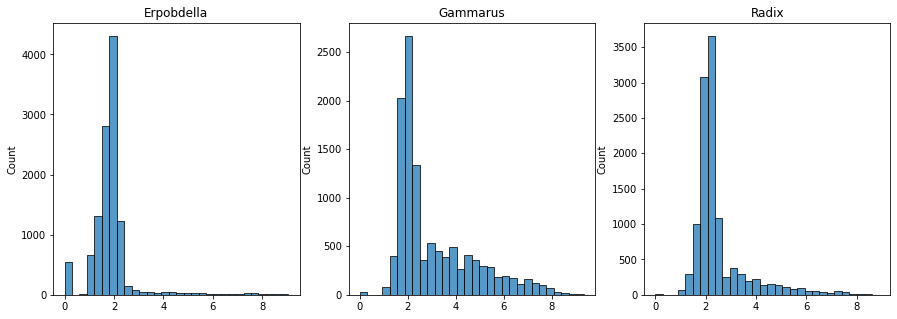

In [113]:
fig_hist,ax_hist = plt.subplots(1,3,figsize = (15,5))
for i,s in enumerate([*species]):
    sns.histplot(np.array(data[s]).flatten(),bins = 30, ax = ax_hist[i])
    ax_hist[i].set_title(species[s])

Note this shows that most events are due to Gammarus or Radix reaction.
Almost no events occur for Erpobdella - only low values.

# FDA

### Data Pretreatment